#  <center> Quiz-2 <br>
#  <center>  Anshika Sharma, UCLA ID:(305488635) 

In [1]:
#In the first step, we import all the functions:
import math
import numpy as np
import pandas as pd

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

#Now, we import self-defined functions:
from util import Cost_Function, Gradient_Descent, Cost_Function_Derivative, Cost_Function, Prediction, Sigmoid

Step: pre-processing the data

In [2]:
# scale data to be between -1,1 

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df = pd.read_csv("data.csv", header=0)

# clean up data
df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))

# formats the input data into two arrays, one of independant variables
# and one of the dependant variable
X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)

print(X.shape)
print(Y.shape)


(100, 2)
(100,)


Splitting the data

In [3]:
# split the dataset into two subsets: testing and training
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33, random_state = 0)

Step: training and testing using sklearn

0.9090909090909091


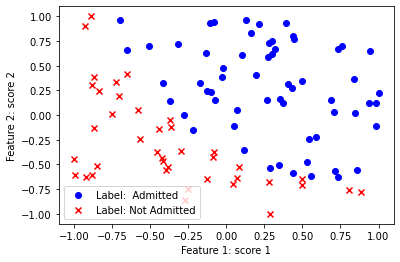

In [4]:
# use sklearn class
clf = LogisticRegression()
# call the function fit() to train the class instance
clf.fit(X_train,Y_train)
# scores over testing samples
print(clf.score(X_test,Y_test))

# visualize data using functions in the library pylab 
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Feature 1: score 1')
ylabel('Feature 2: score 2')
legend(['Label:  Admitted', 'Label: Not Admitted'])
show()


Step-4: training and testing using self-developed model Without bias term

In [5]:
#Without bias term
thetao = [0,0] #initial model parameters
alpha = 0.1 # learning rates
max_iteration = 1000 # maximal iterations

m = len(Y_test) # number of samples

for x in range(max_iteration):
	# call the functions for gradient descent method
	new_theta = Gradient_Descent(X_test,Y_test,thetao,m,alpha)
	thetao = new_theta
	if x % 200 == 0:
		# calculate the cost function with the present theta
		Cost_Function(X_test,Y_test,thetao,m)
		print('theta ', thetao)
		print('cost is ', Cost_Function(X_test,Y_test,thetao,m))
print("coefficeint of model without biase term: ", thetao)
 

theta  [0.012183693210473958, 0.016040785552839883]
cost is  0.6891034524191488
theta  [1.5956683823805158, 1.7623296121264824]
cost is  0.3849535321655343
theta  [2.4325756301192865, 2.4337339751818132]
cost is  0.32597924734364025
theta  [2.9986243664794237, 2.8233699189624857]
cost is  0.3021317059133414
theta  [3.4211968709004585, 3.0958366189533053]
cost is  0.2894222938558452
coefficeint of model without biase term:  [3.752559821674534, 3.304864528964521]


Step: training and testing using self-developed model with biased term

In [6]:
thetab = [0,0,0] #initial model parameters
alphab = 0.1  # learning rates
max_iteration = 1000 # maximal iterations

xValuesb = np.ones((len(Y_train) , 3)) #create array(60,3) of 1 
xValuesb[:, 1:3] = X_train[:, 0:2] # split training and testing data set 
yValuesb = Y_train

m = len(Y_train) # number of samples
total_c = []
for x in range(max_iteration):
    # call the functions for gradient descent method
    new_theta = Gradient_Descent(xValuesb ,yValuesb,thetab,m,alphab)
    thetab = new_theta
    cost = Cost_Function(xValuesb,yValuesb,thetab,m)
    total_c.append(cost)
    if x % 200 == 0:
        # calculate the cost function with the present theta
        print('theta ', thetab)
        print('cost is ', cost)
res = [thetab]
print('theta of final model:',res)
print('cost:', cost)
import matplotlib.pyplot as plt


theta  [0.006716417910447761, 0.017594552563821808, 0.01304107905643599]
cost is  0.6879260076519823
theta  [0.27230486977806295, 1.850974424771395, 1.5674058687026597]
cost is  0.3592535812592333
theta  [0.3268520587698168, 2.609236302445539, 2.341372725818576]
cost is  0.2991557123489569
theta  [0.37559350615582354, 3.0990384653909016, 2.8603236522884714]
cost is  0.2733615848552591
theta  [0.4173426458352523, 3.465619094219974, 3.24944381587512]
cost is  0.2589192974933075
theta of final model: [[0.45279812272943, 3.7577479076198395, 3.5581748294928905]]
cost: 0.24975187267122004


In [7]:
scoreo = 0
scoreb = 0

# accuracy for sklearn
scikit_score = clf.score(X_test,Y_test)
length = len(X_test)
#model without bias term
for i in range(length):
	predictiono = round(Prediction(X_test[i],thetao))
	answero = Y_test[i]
	if predictiono == answero:
		scoreo += 1
my_scoreo = float(scoreo) / float(length) 
        
for i in range(length):
	predictionb = round(Prediction(X_test[i],thetab))
	answero = Y_test[i]
	if predictionb == answero:
		scoreb += 1
my_scoreb = float(scoreb) / float(length)

print('The score of Scikit model: ', scikit_score)
print('The score of model without biased term : ', my_scoreo)
print('The score of model with biased term: ', my_scoreb)     

The score of Scikit model:  0.9090909090909091
The score of model without biased term :  0.8787878787878788
The score of model with biased term:  0.8181818181818182


### <center> Changing hyperparameters, learning rate and max_iteration

### <center> 1 - Self developed model without biased term (Developed using Method-2 of Logistic reg)

In [8]:
##### training and testing using self-developed model without biased term #####

# Change alpha and iteration

def logisticreg(xValues ,yValues,theta,m,alpha,testXValues,Y_test,max_iteration):
    for x in range(max_iteration):
    # call the functions for gradient descent method
        new_theta = Gradient_Descent(xValues ,yValues,theta,m,alpha)
        theta = new_theta
        Cost_Function(xValues,yValues,theta,m)  
    #evaluate model
    score = 0
    length = len(testXValues)
    for i in range(length):
        prediction = round(Prediction(testXValues[i],theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
    my_score = float(score) / float(length)
    res = [my_score]
    res.extend(theta)
    return res

alphar = [0.0001, 0.0007,0.001, 0.007,0.01, 0.07,0.1,0.7 ]
#Initialize the dataframe to store coefficients
col = ['max_iteration']+ ['testing_score'] + ['coef_x_%d'%i for i in range(1,3)]
ind = ['alpha_%.2g'%alphar[i] for i in range(0,8)]
#ind = a+a+a
coef_matrix_logisw = pd.DataFrame(index=ind, columns=col)

thetaw = [0,0] #initial model parameters
xValuesw = X_train # split training and testing data set 
yValuesw = Y_train

m = len(Y_train) # number of samples

testXValues2 = X_test
max_iterationr = [500,1000,10000]
total =  []
for j in range (3):
#Iterate through all powers and assimilate results
    for i in range(8):
        coef_matrix_logisw.iloc[i,0] = max_iterationr[j]
        coef_matrix_logisw.iloc[i,1:] = logisticreg(xValuesw ,yValuesw,thetaw,m,alphar[i],testXValues2,Y_test,max_iterationr[j])
    print(coef_matrix_logisw)   

             max_iteration testing_score    coef_x_1    coef_x_2
alpha_0.0001           500      0.909091  0.00877801  0.00650938
alpha_0.0007           500      0.909091   0.0606454   0.0451006
alpha_0.001            500      0.909091   0.0860722   0.0641008
alpha_0.007            500      0.878788    0.531343    0.406472
alpha_0.01             500      0.878788    0.715914    0.554428
alpha_0.07             500      0.878788      2.4486     2.16307
alpha_0.1              500      0.878788     2.86026     2.59244
alpha_0.7              500      0.878788     5.16359     4.98377
             max_iteration testing_score   coef_x_1   coef_x_2
alpha_0.0001          1000      0.909091  0.0175175  0.0129964
alpha_0.0007          1000      0.909091   0.119456  0.0891309
alpha_0.001           1000      0.909091   0.168453   0.126042
alpha_0.007           1000      0.878788   0.931351    0.73232
alpha_0.01            1000      0.878788    1.20399   0.966156
alpha_0.07            1000      0.878

### <center> 1.1 - My self developed best model without biased term (Developed using Method-2 of Logistic reg)

theta  [0.0001759455256382181, 0.0001304107905643599]
cost is  0.6930992187021833
theta  [0.03505604153083156, 0.026033346305702698]
cost is  0.6836614760174738
theta  [0.06932861224176783, 0.051582944733605106]
cost is  0.6745246882615417
theta of final model: [[0.08607219135348888, 0.06410082372736255]]
cost: 0.670110249585646


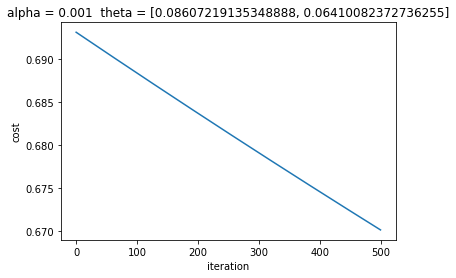

In [9]:
#plotting the convergence curve

#######training and testing using self-developed model biased term (best model)##

thetaw = [0 , 0] #initial model parameters
alphaw = 0.001  # learning rates
max_iteration = 500 # maximal iterations

xValuesw = X_train # split training and testing data set 
yValuesw = Y_train

m = len(Y_train) # number of samples
total_cw = []
for x in range(max_iteration):
    # call the functions for gradient descent method
    new_thetaw = Gradient_Descent(xValuesw ,yValuesw,thetaw,m,alphaw)
    thetaw = new_thetaw
    costw = Cost_Function(xValuesw,yValuesw,thetaw,m)
    total_cw.append(costw)
    if x % 200 == 0:
        # calculate the cost function with the present theta
        print('theta ', thetaw)
        print('cost is ', costw)
resw = [thetaw]
print('theta of final model:',resw)
print('cost:', costw)
import matplotlib.pyplot as plt

plt.plot(range(0,len(total_cw)),total_cw);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(alphaw, thetaw))
plt.show()

In [10]:
# ROC, AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
pred4 = []
pred4 = []
Ytest4 = []
thetaob =   thetaw
print(thetaob)
length = len(X_test)
score = 0   
for i in range(length):
	prediction = round(Prediction(X_test[i],thetaob))
	answer = Y_test[i]
	if prediction == answer:
		score += 1
my_scoreob = float(score) / float(length)

prop4 =[]
for i in range(length):
    prop4 = Prediction(X_test[i],thetaob)
    pred4.append(prop4)

pred_prob4 = np.array(pred4)
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4, pos_label=1)
print('Score of my best model without biased term:', my_scoreob)
print('The AUC score is: ', roc_auc_score(Y_test, pred_prob4))

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
    

[0.08607219135348888, 0.06410082372736255]
Score of my best model without biased term: 0.9090909090909091
The AUC score is:  0.9876033057851239


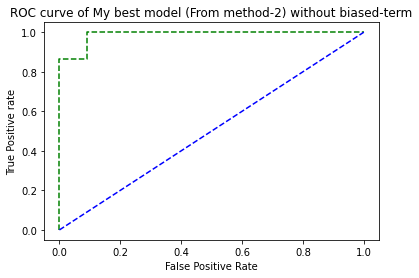

In [11]:
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='my own-model without biased-term')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='My own model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve of My best model (From method-2) without biased-term')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

#plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

### <center> 2 - My Self developed model with biased term (Developed using Method-2 of Logistic reg)

In [12]:

##############training and testing using self-developed model biased term#############

# Change iteration and learning rate, alpha

def logisticreg(xValuesl ,yValuesl,thetal,m,alpha,testXValues1,Y_test,max_iteration):
    for x in range(max_iteration):
    # call the functions for gradient descent method
        new_theta = Gradient_Descent(xValuesl ,yValuesl,thetal,m,alpha)
        thetal = new_theta
        Cost_Function(xValuesl,yValuesl,thetal,m)  
    #evaluate model
    scorel = 0
    length = len(testXValues1)
    for i in range(length):
        predictionl = round(Prediction(testXValues1[i],thetal))
        answerl = Y_test[i]
        if predictionl == answerl:
            scorel += 1
    my_scorel = float(scorel) / float(length)
    res = [my_scorel]
    res.extend(thetal)
    return res

alphar = [0.0001, 0.0007,0.001, 0.007,0.01, 0.07,0.1,0.7 ]
#Initialize the dataframe to store coefficients
col = ['max_iteration']+ ['testing_score'] + ['coef_x_%d'%i for i in range(0,3)]
ind = ['alpha_%.2g'%alphar[i] for i in range(0,8)]
#ind = a+a+a
coef_matrix_logis = pd.DataFrame(index=ind, columns=col)

thetal = [0,0,0] #initial model parameters
xValuesl = np.ones((len(Y_train) , 3)) #create array(60,3) of 1 
xValuesl[:, 1:3] = X_train[:, 0:2] # split training and testing data set 
yValuesl = Y_train

m = len(Y_train) # number of samples

testXValues1 = np.ones((len(X_test), 3)) 
testXValues1[:, 1:3] = X_test[:, 0:2]
max_iterationr = [500,1000,10000]
total =  []
for j in range (3):
#Iterate through all powers and assimilate results
    for i in range(8):
        #print(logisticreg(xValuesl ,yValuesl,thetal,m,alphar[i],testXValues1,Y_test,max_iteration))
        coef_matrix_logis.iloc[i,0] = max_iterationr[j]
        coef_matrix_logis.iloc[i,1:] = logisticreg(xValuesl ,yValuesl,thetal,m,alphar[i],testXValues1,Y_test,max_iterationr[j])
    print(coef_matrix_logis)


             max_iteration testing_score    coef_x_0    coef_x_1    coef_x_2
alpha_0.0001           500      0.909091  0.00333508  0.00877749  0.00650892
alpha_0.0007           500      0.909091   0.0224031   0.0606206   0.0450791
alpha_0.001            500      0.909091   0.0313571   0.0860226   0.0640577
alpha_0.007            500      0.969697    0.150285    0.529858    0.405171
alpha_0.01             500      0.939394    0.181938    0.713593    0.552421
alpha_0.07             500      0.878788    0.313333     2.45118     2.17586
alpha_0.1              500      0.909091    0.351853      2.8723     2.61948
alpha_0.7              500      0.878788    0.666873     5.40514     5.27882
             max_iteration testing_score    coef_x_0   coef_x_1   coef_x_2
alpha_0.0001          1000      0.909091  0.00662422  0.0175154  0.0129946
alpha_0.0007          1000      0.909091   0.0427244   0.119361  0.0890484
alpha_0.001           1000      0.939394   0.0586305   0.168268   0.125881
alpha_0

### <center> 2.1 - My Self Developed best model without biased term

In [13]:

##############training and testing using self-developed model biased term (best model)#########

thetab = [0,0,0] #initial model parameters
alphab = 0.007  # learning rates
max_iteration = 500 # maximal iterations

xValuesb = np.ones((len(Y_train) , 3)) #create array(60,3) of 1 
xValuesb[:, 1:3] = X_train[:, 0:2] # split training and testing data set 
yValuesb = Y_train

m = len(Y_train) # number of samples
total_c = []
for x in range(max_iteration):
    # call the functions for gradient descent method
    new_theta = Gradient_Descent(xValuesb ,yValuesb,thetab,m,alphab)
    thetab = new_theta
    cost = Cost_Function(xValuesb,yValuesb,thetab,m)
    total_c.append(cost)
    if x % 200 == 0:
        # calculate the cost function with the present theta
        print('theta ', thetab)
        print('cost is ', cost)
reso = [thetab]
print('theta of final model:',reso)
print('cost:', cost)
import matplotlib.pyplot as plt

theta  [0.0004701492537313433, 0.0012316186794675264, 0.0009128755339505193]
cost is  0.6927799856769551
theta  [0.07823476128470279, 0.2326242778839475, 0.17466066090563273]
cost is  0.6285517031961659
theta  [0.1308450587723458, 0.43721295405782806, 0.3323556193105979]
cost is  0.5788554335203299
theta of final model: [[0.1502850351645228, 0.5298583938680445, 0.40517062878393867]]
cost: 0.5582733025767725


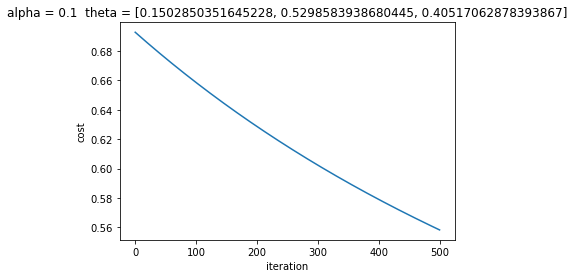

In [14]:
#visualize the convergence curve
plt.plot(range(0,len(total_c)),total_c);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(alpha, thetab))
plt.show()

In [15]:
# ROC, AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
pred1 = []
pred1 = []
Ytest1 = []
thetaob = thetab  
print(thetaob)
length = len(X_test)
scoreb = 0   

# My best model
testXValues1 = np.ones((len(X_test), 3)) 
testXValues1[:, 1:3] = X_test[:, 0:2]
for i in range(length):
	predictionb = round(Prediction(testXValues1[i],thetaob))
	answerb = Y_test[i]
	if predictionb == answerb:
		scoreb += 1
        
my_scoreob = float(scoreb) / float(length)

for i in range(length):
    prop1 = Prediction(testXValues1[i],thetaob)
    pred1.append(prop1)
pred_prob2 = np.array(pred1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2, pos_label=1)
print('Score of my best model with biased term : ', my_scoreob)
print('AUC score', roc_auc_score(Y_test, pred_prob2))
    

[0.1502850351645228, 0.5298583938680445, 0.40517062878393867]
Score of my best model with biased term :  0.9696969696969697
AUC score 0.9876033057851239


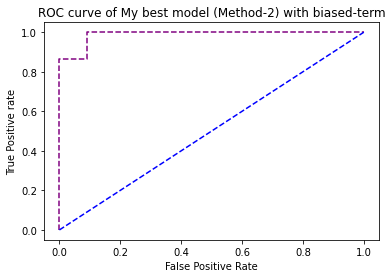

In [16]:
# plot roc curves
#plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='Using Scikit-Learning')
plt.plot(fpr2, tpr2, linestyle='--',color='purple', label='My own model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve of My best model (Method-2) with biased-term')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

#plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

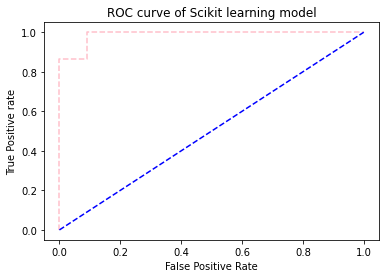

Scikit-learn, accuracy score: 0.9090909090909091
Scikit-learn, auc score: 0.9876033057851239


In [17]:
# Scikit learning

pred_prob1 = clf.predict_proba(X_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)

#plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='pink', label='Using Scikit-Learning')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='My own model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve of Scikit learning model')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

#plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

print("Scikit-learn, accuracy score:", clf.score(X_test, Y_test))
print("Scikit-learn, auc score:", roc_auc_score(Y_test, pred_prob1[:,1]))

In [21]:
Y_test.mean()

0.6666666666666666

In [22]:
Y_train.mean()

0.5671641791044776